The goal of this notebook is to evaluate the method to generate persistence images used by [Zhao and Wang](https://papers.nips.cc/paper/9178-learning-metrics-for-persistence-based-summaries-and-applications-for-graph-classification.pdf).  

In their paper, they achieve very competitive classification performance on graph benchmark datasets, using only topological information of the graph and without using node and edge labels. Their method consists in generating persistence images of the graphs, learning a weighted kernel on those persistence images and applying this kernel to classify the graphs.  

Here, I show that the impressive performance of their method may be due more to the filtration they used to generate the persistence diagrams than to their weighted kernel. To that end, I classify the persistence images that they generated (available on [GitHub](https://github.com/topology474/WKPI)) with a simple linear SVM, and I show that I get even better results than what they report with their learnt weighted kernel.

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
#Load persistant images (from Zhao and Wang) and labels
pimage_path = "Datasets/WKPI/proteinPDPI/proteinPI/"
images = [np.loadtxt(pimage_path + str(i) + "_PI.pdg") for i in range(len(os.listdir(pimage_path)) -2)]
y = np.loadtxt(pimage_path + "labels.txt")

In [3]:
#Evaluate linaer SVM classifier with nested cross-validation

param_grid = [
  {'kernel': ['linear'] , 'C': [1, 10, 100, 1000]},
 ]
scoring_metric = "accuracy"

np.random.seed(10)
clf = GridSearchCV(SVC(),param_grid=param_grid,scoring = scoring_metric,n_jobs=-1,cv=5)
scores = cross_val_score(clf,X=images,y=y,cv=5)
print(scores)
print(np.mean(scores))

[0.82959641 0.84753363 0.81531532 0.86936937 0.83783784]
0.8399305134731143


As a comparison, the best accuracy reported for the PROTEINS dataset in Table 2 of [Zhao and Wang](https://papers.nips.cc/paper/9178-learning-metrics-for-persistence-based-summaries-and-applications-for-graph-classification.pdf#page=9) was 78, and most methods had an accuracy of 75 for this dataset.

Zhao and Wang do not provide the code for how they generated the persistent diagrams. They only mention that they used filtrations based on Jaccard index (for large graphs) or Ricci curvature (for small graphs), that they used both sublevels and superlevels filtrations (which results in some points having a lower death than birth) and that they used 0-dimensional and 1-dimensional persistence points. 

In the following, I plot 10 of their persistence diagrams for the protein dataset:

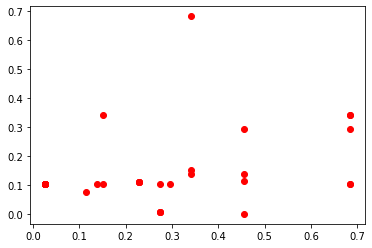

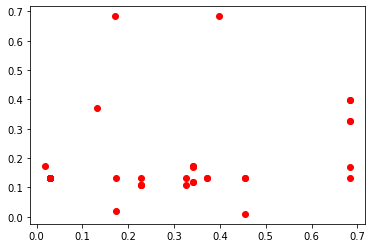

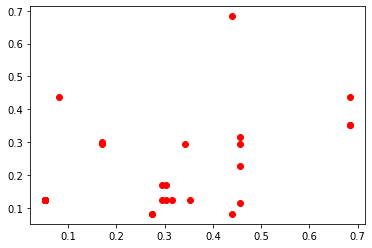

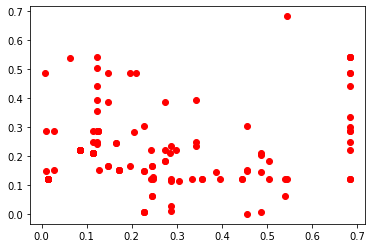

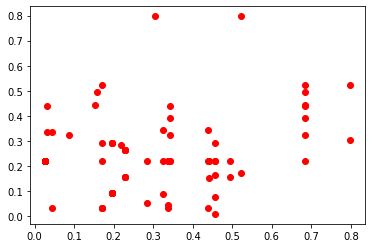

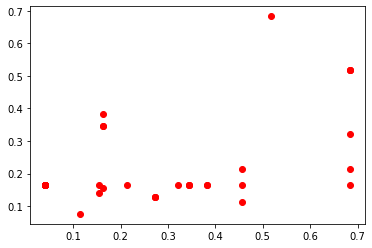

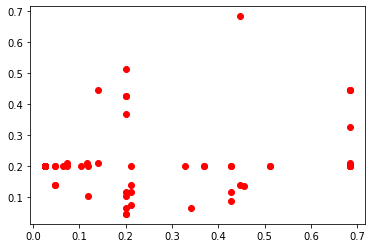

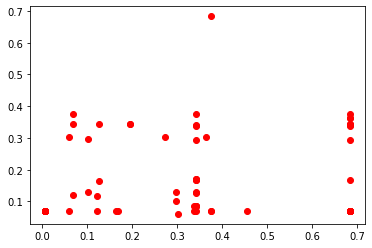

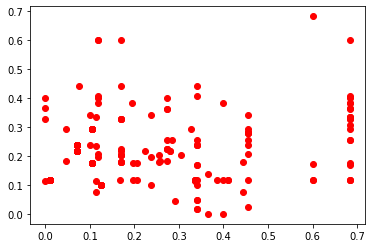

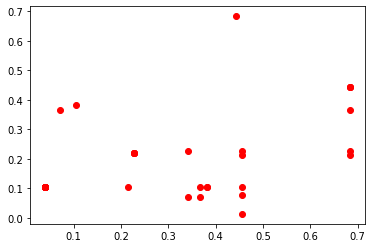

In [17]:
pdiagram_path = "Datasets/WKPI/proteinPDPI/proteinPD/"
pdNum = len(os.listdir(pdiagram_path)) 
persistence_diagrams = [np.loadtxt(pdiagram_path + str(i) + "_PD.pdg") for i in range(10)]

for dg in persistence_diagrams:
  plt.plot(*zip(*dg),"ro")
  plt.show()
